# Introduction

This analysis is performed with the end goal of creating a Venn diagram between samples that were run in the Astral Mass Spectrometer.
Samples 7 and 9 were Brain Extract that had undergone immunodepletion (called Extract1), whereas Samples 8 and 10 had a Brain Extract that had NOT undergone immunodepletion (Extract 2).



In [75]:
#import libraries

import os
import numpy as np
import pandas as pd
from openpyxl import Workbook
from matplotlib import pyplot as plt

from venn import venn

In [2]:
#Change directory to where xlsx file is

os.chdir("C:\\Users\\miyoh\\OneDrive - University of Toronto\\University\\University of Toronto\\Diamandis Lab\\Analyses\\Python\\Analysis_of_MS_data\\BE_beads_optimization")

In [3]:
#Double check that current directory is correct

current_cwd = os.getcwd()
print(current_cwd)

C:\Users\miyoh\OneDrive - University of Toronto\University\University of Toronto\Diamandis Lab\Analyses\Python\Analysis_of_MS_data\BE_beads_optimization


In [4]:
#see what files are in the current working directory

print(os.listdir())

['BE_beads_file.xlsx', 'Protein_Comparison_Check.ipynb', 'venndiagram4.png']


### Load excel files

In [23]:
#Read file with all sheets using class ExcelFile
#pandas.ExcelFile : Class for parsing tabular Excel sheets into DataFrame objects.

file_sheet1 = pd.ExcelFile("BE_beads_file.xlsx")
df1 = file_sheet1.parse(file_sheet1.sheet_names[0]) #read Sheet1
df2 = file_sheet1.parse(file_sheet1.sheet_names[1]) #read Sheet2

In [24]:
df1 #output dataframe df1 to see columns and rows
#seems like we can make columns more legible

,PG.ProteinGroups,PG.Genes,[1] NBCC00506_Diamandis_Miyo_hBrainExtract_IP_10.htrms.PG.Quantity,[2] NBCC00506_Diamandis_Miyo_hBrainExtract_IP_9.htrms.PG.Quantity,Type
0,A0A024RBG1;O95989;Q8NFP7;Q96G61;Q9NZJ9,NUDT4B;NUDT3;NUDT10;NUDT11;NUDT4,76.195518,100.954163,IP_extract
1,A0A075B6I0,IGLV8-61,7518.245117,6867.437988,IP_extract
2,A0A075B6I7,IGLV5-48,160.719650,NaN,IP_extract
3,A0A075B6I9,IGLV7-46,1183.352905,1107.794312,IP_extract
4,A0A075B6J9,IGLV2-18,286.334625,341.081512,IP_extract
...,...,...,...,...,...
1545,Q9Y6A4,CFAP20,300.793671,372.915070,IP_extract
1546,Q9Y6D9,MAD1L1,NaN,134.484344,IP_extract
1547,Q9Y6I8,PXMP4,42.271797,536.959595,IP_extract
1548,Q9Y6K5,OAS3,132.376022,336.046906,IP_extract


In [25]:
df2 #repeat for df2

,PG.ProteinGroups,PG.Genes,Type,[1] NBCC00506_Diamandis_Miyo_hBrainExtract_7.htrms.PG.Quantity,[2] NBCC00506_Diamandis_Miyo_hBrainExtract_8.htrms.PG.Quantity
0,A0A024R1R8;Q9Y2S6,TMA7B;TMA7,hExtract,NaN,941.715759
1,A0A075B6H7;A0A0C4DH55;P01624,IGKV3-7;IGKV3D-7;IGKV3-15,hExtract,NaN,10105.426758
2,A0A075B6I0,IGLV8-61,hExtract,NaN,1176.760864
3,A0A075B6K4;P01717,IGLV3-10;IGLV3-25,hExtract,NaN,695.859070
4,A0A075B6P5;A0A075B6S2;A0A075B6S6;A0A087WW87;A0...,IGKV2-28;IGKV2D-29;IGKV2D-30;IGKV2-40;IGKV2D-2...,hExtract,NaN,5665.676758
...,...,...,...,...,...
4155,Q9Y6V0,PCLO,hExtract,NaN,1732.306885
4156,Q9Y6W5,WASF2,hExtract,NaN,1727.191528
4157,Q9Y6X4,FAM169A,hExtract,NaN,912.966675
4158,Q9Y6Y0,IVNS1ABP,hExtract,NaN,633.782776


## Preprocess df1 and df2 for Venn diagram analysis

### df1 preprocessing

In [26]:
#Rename columns for clarity for df1
df1 = df1.rename(columns={"PG.ProteinGroups" : "Protein_Groups",
                          "PG.Genes": "Genes",
                          "[1] NBCC00506_Diamandis_Miyo_hBrainExtract_IP_10.htrms.PG.Quantity": "IP_protein_intensity_sample_10",
                          "[2] NBCC00506_Diamandis_Miyo_hBrainExtract_IP_9.htrms.PG.Quantity": "IP_protein_intensity_sample_9",
                          "Type": "Type"})

In [27]:
df1

,Protein_Groups,Genes,IP_protein_intensity_sample_10,IP_protein_intensity_sample_9,Type
0,A0A024RBG1;O95989;Q8NFP7;Q96G61;Q9NZJ9,NUDT4B;NUDT3;NUDT10;NUDT11;NUDT4,76.195518,100.954163,IP_extract
1,A0A075B6I0,IGLV8-61,7518.245117,6867.437988,IP_extract
2,A0A075B6I7,IGLV5-48,160.719650,NaN,IP_extract
3,A0A075B6I9,IGLV7-46,1183.352905,1107.794312,IP_extract
4,A0A075B6J9,IGLV2-18,286.334625,341.081512,IP_extract
...,...,...,...,...,...
1545,Q9Y6A4,CFAP20,300.793671,372.915070,IP_extract
1546,Q9Y6D9,MAD1L1,NaN,134.484344,IP_extract
1547,Q9Y6I8,PXMP4,42.271797,536.959595,IP_extract
1548,Q9Y6K5,OAS3,132.376022,336.046906,IP_extract


If we wanted to separate the protein groups into individual proteins, we would do the following: 

#For df1, IP Brain Extract data (Astral)

separator = ";" #to separate the protein groups into separate rows, I need to separate by the semicolon

df1["Genes"] = df1["Genes"].str.split(separator)

df1 = df1.explode("Genes", ignore_index = True)

In [28]:
#For df1, IP Brain Extract data (Astral)
#I have to remove iRT, prpL and Cont_ proteins

df1 = df1[~df1['Protein_Groups'].astype(str).str.startswith('Cont_')]


In [29]:
df1 = df1[~df1['Protein_Groups'].astype(str).str.startswith('iRT')] #remove iRT

In [31]:
df1 = df1[~df1['Protein_Groups'].astype(str).str.startswith('prpL')] #remove prpL

In [32]:
df1 #show what it looks like

,Protein_Groups,Genes,IP_protein_intensity_sample_10,IP_protein_intensity_sample_9,Type
0,A0A024RBG1;O95989;Q8NFP7;Q96G61;Q9NZJ9,NUDT4B;NUDT3;NUDT10;NUDT11;NUDT4,76.195518,100.954163,IP_extract
1,A0A075B6I0,IGLV8-61,7518.245117,6867.437988,IP_extract
2,A0A075B6I7,IGLV5-48,160.719650,NaN,IP_extract
3,A0A075B6I9,IGLV7-46,1183.352905,1107.794312,IP_extract
4,A0A075B6J9,IGLV2-18,286.334625,341.081512,IP_extract
...,...,...,...,...,...
1545,Q9Y6A4,CFAP20,300.793671,372.915070,IP_extract
1546,Q9Y6D9,MAD1L1,NaN,134.484344,IP_extract
1547,Q9Y6I8,PXMP4,42.271797,536.959595,IP_extract
1548,Q9Y6K5,OAS3,132.376022,336.046906,IP_extract


In [33]:
df1 = df1.drop('Protein_Groups', axis =1) #drop column named "Protein_Groups", it is redundant

In [34]:
#Check counts of IP_protein_intensity_sample_9 and 10
df1.count() #counts only Non-NaN values


Genes                             1518
IP_protein_intensity_sample_10    1488
IP_protein_intensity_sample_9     1479
Type                              1518
dtype: int64

### df2 preprocessing

In [36]:
#Rename columns for clarity for df2
df2 = df2.rename(columns={"PG.ProteinGroups" : "Protein_Groups",
                          "PG.Genes": "Genes",
                          "Type": "Type",
                          "[1] NBCC00506_Diamandis_Miyo_hBrainExtract_7.htrms.PG.Quantity": "Prot_protein_intensity_sample_7",
                          "[2] NBCC00506_Diamandis_Miyo_hBrainExtract_8.htrms.PG.Quantity": "Prot_protein_intensity_sample_8"})

If I want to separate protein groups into individual proteins

#For df2, Brain Extract proteome data (Astral)

separator = ";" #to separate the protein groups into separate rows, I need to separate by the semicolon

df2["Genes"] = df2["Genes"].str.split(separator)

df2 = df2.explode("Genes", ignore_index = True)

In [37]:
#For df2, Prot Brain Extract data (Astral)
#I have to remove iRT, prpL and Cont_ proteins

df2 = df2[~df2['Protein_Groups'].astype(str).str.startswith('Cont_')]
df2 = df2[~df2['Protein_Groups'].astype(str).str.startswith('iRT')] #remove iRT
df2 = df2[~df2['Protein_Groups'].astype(str).str.startswith('prpL')] #remove prpL


In [38]:
df2 #show what it looks like

,Protein_Groups,Genes,Type,Prot_protein_intensity_sample_7,Prot_protein_intensity_sample_8
0,A0A024R1R8;Q9Y2S6,TMA7B;TMA7,hExtract,NaN,941.715759
1,A0A075B6H7;A0A0C4DH55;P01624,IGKV3-7;IGKV3D-7;IGKV3-15,hExtract,NaN,10105.426758
2,A0A075B6I0,IGLV8-61,hExtract,NaN,1176.760864
3,A0A075B6K4;P01717,IGLV3-10;IGLV3-25,hExtract,NaN,695.859070
4,A0A075B6P5;A0A075B6S2;A0A075B6S6;A0A087WW87;A0...,IGKV2-28;IGKV2D-29;IGKV2D-30;IGKV2-40;IGKV2D-2...,hExtract,NaN,5665.676758
...,...,...,...,...,...
4155,Q9Y6V0,PCLO,hExtract,NaN,1732.306885
4156,Q9Y6W5,WASF2,hExtract,NaN,1727.191528
4157,Q9Y6X4,FAM169A,hExtract,NaN,912.966675
4158,Q9Y6Y0,IVNS1ABP,hExtract,NaN,633.782776


In [39]:
df2 = df2.drop('Protein_Groups', axis =1) #drop column named "Protein_Groups", it is redundant

In [40]:
#Check counts of Prot_protein_intensity_sample_7 and 8
df2.count() #counts only Non-NaN values

Genes                              4132
Type                               4132
Prot_protein_intensity_sample_7    2095
Prot_protein_intensity_sample_8    4040
dtype: int64

### Merge df1 and df2

In [41]:
#Merge on common

df_all = pd.merge(df1, df2, on= "Genes")

In [42]:
df_all #check to see how it looks like

,Genes,IP_protein_intensity_sample_10,IP_protein_intensity_sample_9,Type_x,Type_y,Prot_protein_intensity_sample_7,Prot_protein_intensity_sample_8
0,IGLV8-61,7518.245117,6867.437988,IP_extract,hExtract,NaN,1176.760864
1,IGHV3-64,197.117630,42.002613,IP_extract,hExtract,NaN,349.623688
2,IGKV2D-24;IGKV2-24,2049.163574,956.080078,IP_extract,hExtract,NaN,1151.002808
3,IGKV3D-15,5462.195312,3306.439209,IP_extract,hExtract,NaN,3020.677490
4,IGKV3D-11;IGKV3-11,7348.438477,7627.876953,IP_extract,hExtract,NaN,2041.921387
...,...,...,...,...,...,...,...
1267,RBM8A,26.393848,589.654907,IP_extract,hExtract,74.771645,1413.975586
1268,PSAT1,240.136841,480.135468,IP_extract,hExtract,2350.343262,11919.987305
1269,PXMP4,42.271797,536.959595,IP_extract,hExtract,NaN,550.221741
1270,OAS3,132.376022,336.046906,IP_extract,hExtract,193.258224,NaN


### Counting the NaNs

In [19]:
#function that counts NaNs


In [43]:
df1["IP_protein_intensity_sample_9"].isna().sum()

39

In [44]:
df1["IP_protein_intensity_sample_10"].isna().sum()

30

In [45]:
df2["Prot_protein_intensity_sample_7"].isna().sum()

2037

In [46]:
df2['Prot_protein_intensity_sample_8'].isna().sum()

92

In [47]:
df_all["IP_protein_intensity_sample_10"].isna().sum()

18

In [48]:
df_all["IP_protein_intensity_sample_9"].isna().sum()

24

In [49]:
df_all["Prot_protein_intensity_sample_7"].isna().sum()

210

In [50]:
df_all["Prot_protein_intensity_sample_8"].isna().sum()

16

In [51]:
df1_sample9 = df1.drop(["IP_protein_intensity_sample_10"], axis=1)
df1_sample10 = df1.drop(["IP_protein_intensity_sample_9"], axis=1)
df2_sample7 = df2.drop(["Prot_protein_intensity_sample_8"], axis=1)
df2_sample8 = df2.drop(["Prot_protein_intensity_sample_7"], axis=1)

## Brain Extract 1 (Samples 7 and 9) analysis (Astral data)
Brain Extract 1 was immunodepleted using a gel and phosphate buffer (pH=7)

In [52]:
df_Extract1 = pd.merge(df2_sample7, df1_sample9, on= "Genes")
df_Extract1 = df_Extract1.dropna(subset=["Prot_protein_intensity_sample_7","IP_protein_intensity_sample_9"], how="all")

In [53]:
df_Extract1

,Genes,Type_x,Prot_protein_intensity_sample_7,IP_protein_intensity_sample_9,Type_y
0,IGLV8-61,hExtract,NaN,6867.437988,IP_extract
1,IGHV3-64,hExtract,NaN,42.002613,IP_extract
2,IGKV2D-24;IGKV2-24,hExtract,NaN,956.080078,IP_extract
3,IGKV3D-15,hExtract,NaN,3306.439209,IP_extract
4,IGKV3D-11;IGKV3-11,hExtract,NaN,7627.876953,IP_extract
...,...,...,...,...,...
1267,RBM8A,hExtract,74.771645,589.654907,IP_extract
1268,PSAT1,hExtract,2350.343262,480.135468,IP_extract
1269,PXMP4,hExtract,NaN,536.959595,IP_extract
1270,OAS3,hExtract,193.258224,336.046906,IP_extract


In [54]:
df_Extract1.dropna()

,Genes,Type_x,Prot_protein_intensity_sample_7,IP_protein_intensity_sample_9,Type_y
6,GATD3B;GATD3,hExtract,4789.083984,352.717041,IP_extract
13,PGP,hExtract,452.022522,281.204498,IP_extract
17,NACA,hExtract,238.276367,477.409363,IP_extract
18,KIF2A,hExtract,126.920860,110.750587,IP_extract
19,ACOT7,hExtract,4670.033203,537.465759,IP_extract
...,...,...,...,...,...
1266,GMPPB,hExtract,584.484436,88.673386,IP_extract
1267,RBM8A,hExtract,74.771645,589.654907,IP_extract
1268,PSAT1,hExtract,2350.343262,480.135468,IP_extract
1270,OAS3,hExtract,193.258224,336.046906,IP_extract


In [55]:
df_Extract1[df_Extract1["IP_protein_intensity_sample_9"].notna()]

,Genes,Type_x,Prot_protein_intensity_sample_7,IP_protein_intensity_sample_9,Type_y
0,IGLV8-61,hExtract,NaN,6867.437988,IP_extract
1,IGHV3-64,hExtract,NaN,42.002613,IP_extract
2,IGKV2D-24;IGKV2-24,hExtract,NaN,956.080078,IP_extract
3,IGKV3D-15,hExtract,NaN,3306.439209,IP_extract
4,IGKV3D-11;IGKV3-11,hExtract,NaN,7627.876953,IP_extract
...,...,...,...,...,...
1267,RBM8A,hExtract,74.771645,589.654907,IP_extract
1268,PSAT1,hExtract,2350.343262,480.135468,IP_extract
1269,PXMP4,hExtract,NaN,536.959595,IP_extract
1270,OAS3,hExtract,193.258224,336.046906,IP_extract


In [56]:
df_Extract1[df_Extract1["Prot_protein_intensity_sample_7"].notna()]

,Genes,Type_x,Prot_protein_intensity_sample_7,IP_protein_intensity_sample_9,Type_y
6,GATD3B;GATD3,hExtract,4789.083984,352.717041,IP_extract
13,PGP,hExtract,452.022522,281.204498,IP_extract
17,NACA,hExtract,238.276367,477.409363,IP_extract
18,KIF2A,hExtract,126.920860,110.750587,IP_extract
19,ACOT7,hExtract,4670.033203,537.465759,IP_extract
...,...,...,...,...,...
1266,GMPPB,hExtract,584.484436,88.673386,IP_extract
1267,RBM8A,hExtract,74.771645,589.654907,IP_extract
1268,PSAT1,hExtract,2350.343262,480.135468,IP_extract
1270,OAS3,hExtract,193.258224,336.046906,IP_extract


## Brain Extract 2 (Samples 8 and 10) analysis (Astral data)
Brain Extract 2 was not immunodepleted


In [57]:
df2_sample8.dropna()

,Genes,Type,Prot_protein_intensity_sample_8
0,TMA7B;TMA7,hExtract,941.715759
1,IGKV3-7;IGKV3D-7;IGKV3-15,hExtract,10105.426758
2,IGLV8-61,hExtract,1176.760864
3,IGLV3-10;IGLV3-25,hExtract,695.859070
4,IGKV2-28;IGKV2D-29;IGKV2D-30;IGKV2-40;IGKV2D-2...,hExtract,5665.676758
...,...,...,...
4155,PCLO,hExtract,1732.306885
4156,WASF2,hExtract,1727.191528
4157,FAM169A,hExtract,912.966675
4158,IVNS1ABP,hExtract,633.782776


In [58]:
df1_sample10.dropna()

,Genes,IP_protein_intensity_sample_10,Type
0,NUDT4B;NUDT3;NUDT10;NUDT11;NUDT4,76.195518,IP_extract
1,IGLV8-61,7518.245117,IP_extract
2,IGLV5-48,160.719650,IP_extract
3,IGLV7-46,1183.352905,IP_extract
4,IGLV2-18,286.334625,IP_extract
...,...,...,...
1544,PSAT1,240.136841,IP_extract
1545,CFAP20,300.793671,IP_extract
1547,PXMP4,42.271797,IP_extract
1548,OAS3,132.376022,IP_extract


In [59]:
df_Extract2 = pd.merge(df2_sample8, df1_sample10, on= "Genes", how="outer")

In [ ]:
df_Extract2.dropna() #proteins that are in both samples

,Genes,Type_x,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,Type_y
1,A2M,hExtract,13401.454102,441.864197,IP_extract
4,AAMDC,hExtract,3056.743652,99.221001,IP_extract
6,AARS1,hExtract,2341.778809,252.322174,IP_extract
10,ABAT,hExtract,16117.220703,169.743225,IP_extract
14,ABCE1,hExtract,18.990286,1051.456421,IP_extract
...,...,...,...,...,...
4355,YWHAH,hExtract,8298.808594,197.005798,IP_extract
4356,YWHAQ,hExtract,8925.971680,265.325073,IP_extract
4365,ZFR,hExtract,670.546387,104.012596,IP_extract
4369,ZNF207,hExtract,232.989975,1802.745361,IP_extract


In [61]:
df_Extract2 = pd.merge(df2_sample8, df1_sample10, on= "Genes")
df_Extract2 = df_Extract2.dropna(subset=["Prot_protein_intensity_sample_8","IP_protein_intensity_sample_10"], how="all")

In [62]:
df_Extract2

,Genes,Type_x,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,Type_y
0,IGLV8-61,hExtract,1176.760864,7518.245117,IP_extract
1,IGHV3-64,hExtract,349.623688,197.117630,IP_extract
2,IGKV2D-24;IGKV2-24,hExtract,1151.002808,2049.163574,IP_extract
3,IGKV3D-15,hExtract,3020.677490,5462.195312,IP_extract
4,IGKV3D-11;IGKV3-11,hExtract,2041.921387,7348.438477,IP_extract
...,...,...,...,...,...
1267,RBM8A,hExtract,1413.975586,26.393848,IP_extract
1268,PSAT1,hExtract,11919.987305,240.136841,IP_extract
1269,PXMP4,hExtract,550.221741,42.271797,IP_extract
1270,OAS3,hExtract,NaN,132.376022,IP_extract


In [63]:
df_Extract2.dropna()

,Genes,Type_x,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,Type_y
0,IGLV8-61,hExtract,1176.760864,7518.245117,IP_extract
1,IGHV3-64,hExtract,349.623688,197.117630,IP_extract
2,IGKV2D-24;IGKV2-24,hExtract,1151.002808,2049.163574,IP_extract
3,IGKV3D-15,hExtract,3020.677490,5462.195312,IP_extract
4,IGKV3D-11;IGKV3-11,hExtract,2041.921387,7348.438477,IP_extract
...,...,...,...,...,...
1266,GMPPB,hExtract,6405.320801,185.980606,IP_extract
1267,RBM8A,hExtract,1413.975586,26.393848,IP_extract
1268,PSAT1,hExtract,11919.987305,240.136841,IP_extract
1269,PXMP4,hExtract,550.221741,42.271797,IP_extract


In [64]:
df_Extract2[df_Extract2["IP_protein_intensity_sample_10"].notna()]

,Genes,Type_x,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,Type_y
0,IGLV8-61,hExtract,1176.760864,7518.245117,IP_extract
1,IGHV3-64,hExtract,349.623688,197.117630,IP_extract
2,IGKV2D-24;IGKV2-24,hExtract,1151.002808,2049.163574,IP_extract
3,IGKV3D-15,hExtract,3020.677490,5462.195312,IP_extract
4,IGKV3D-11;IGKV3-11,hExtract,2041.921387,7348.438477,IP_extract
...,...,...,...,...,...
1267,RBM8A,hExtract,1413.975586,26.393848,IP_extract
1268,PSAT1,hExtract,11919.987305,240.136841,IP_extract
1269,PXMP4,hExtract,550.221741,42.271797,IP_extract
1270,OAS3,hExtract,NaN,132.376022,IP_extract


In [65]:
df_Extract2[df_Extract2["Prot_protein_intensity_sample_8"].notna()]

,Genes,Type_x,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,Type_y
0,IGLV8-61,hExtract,1176.760864,7518.245117,IP_extract
1,IGHV3-64,hExtract,349.623688,197.117630,IP_extract
2,IGKV2D-24;IGKV2-24,hExtract,1151.002808,2049.163574,IP_extract
3,IGKV3D-15,hExtract,3020.677490,5462.195312,IP_extract
4,IGKV3D-11;IGKV3-11,hExtract,2041.921387,7348.438477,IP_extract
...,...,...,...,...,...
1266,GMPPB,hExtract,6405.320801,185.980606,IP_extract
1267,RBM8A,hExtract,1413.975586,26.393848,IP_extract
1268,PSAT1,hExtract,11919.987305,240.136841,IP_extract
1269,PXMP4,hExtract,550.221741,42.271797,IP_extract


## Venn Diagrams

In [66]:
df_outer = pd.merge(df2, df1, on="Genes", how = 'outer')

In [67]:
df_outer

,Genes,Type_x,Prot_protein_intensity_sample_7,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,IP_protein_intensity_sample_9,Type_y
0,A1BG,hExtract,519.226379,1328.113647,NaN,NaN,NaN
1,A2M,hExtract,5490.884277,13401.454102,441.864197,437.197784,IP_extract
2,A2ML1,NaN,NaN,NaN,170.540497,98.672157,IP_extract
3,AAK1,hExtract,207.965225,3369.322021,NaN,NaN,NaN
4,AAMDC,hExtract,NaN,3056.743652,99.221001,9.217689,IP_extract
...,...,...,...,...,...,...,...
4374,ZRANB2,hExtract,NaN,1639.988770,191.571060,136.081345,IP_extract
4375,ZSWIM9,NaN,NaN,NaN,1747.193726,976.864441,IP_extract
4376,ZYG11B,hExtract,NaN,122.775696,NaN,NaN,NaN
4377,ZYX,hExtract,NaN,2243.444336,NaN,NaN,NaN


In [68]:
df_outer['Prot_protein_intensity_sample_7'] = df_outer['Prot_protein_intensity_sample_7'].fillna(0)
df_outer['Prot_protein_intensity_sample_8'] = df_outer['Prot_protein_intensity_sample_8'].fillna(0)
df_outer['IP_protein_intensity_sample_10'] = df_outer['IP_protein_intensity_sample_10'].fillna(0)
df_outer['IP_protein_intensity_sample_9'] = df_outer['IP_protein_intensity_sample_9'].fillna(0)



In [69]:
df_outer

,Genes,Type_x,Prot_protein_intensity_sample_7,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,IP_protein_intensity_sample_9,Type_y
0,A1BG,hExtract,519.226379,1328.113647,0.000000,0.000000,NaN
1,A2M,hExtract,5490.884277,13401.454102,441.864197,437.197784,IP_extract
2,A2ML1,NaN,0.000000,0.000000,170.540497,98.672157,IP_extract
3,AAK1,hExtract,207.965225,3369.322021,0.000000,0.000000,NaN
4,AAMDC,hExtract,0.000000,3056.743652,99.221001,9.217689,IP_extract
...,...,...,...,...,...,...,...
4374,ZRANB2,hExtract,0.000000,1639.988770,191.571060,136.081345,IP_extract
4375,ZSWIM9,NaN,0.000000,0.000000,1747.193726,976.864441,IP_extract
4376,ZYG11B,hExtract,0.000000,122.775696,0.000000,0.000000,NaN
4377,ZYX,hExtract,0.000000,2243.444336,0.000000,0.000000,NaN


In [70]:
df_outer.loc[df_outer["IP_protein_intensity_sample_10"] > 1, "IP_protein_intensity_sample_10"] = 1
df_outer.loc[df_outer["IP_protein_intensity_sample_9"] > 1, "IP_protein_intensity_sample_9"] = 1
df_outer.loc[df_outer["Prot_protein_intensity_sample_8"] > 1, "Prot_protein_intensity_sample_8"] = 1
df_outer.loc[df_outer["Prot_protein_intensity_sample_7"] > 1, "Prot_protein_intensity_sample_7"] = 1


In [71]:
df_outer

,Genes,Type_x,Prot_protein_intensity_sample_7,Prot_protein_intensity_sample_8,IP_protein_intensity_sample_10,IP_protein_intensity_sample_9,Type_y
0,A1BG,hExtract,1.0,1.0,0.0,0.0,NaN
1,A2M,hExtract,1.0,1.0,1.0,1.0,IP_extract
2,A2ML1,NaN,0.0,0.0,1.0,1.0,IP_extract
3,AAK1,hExtract,1.0,1.0,0.0,0.0,NaN
4,AAMDC,hExtract,0.0,1.0,1.0,1.0,IP_extract
...,...,...,...,...,...,...,...
4374,ZRANB2,hExtract,0.0,1.0,1.0,1.0,IP_extract
4375,ZSWIM9,NaN,0.0,0.0,1.0,1.0,IP_extract
4376,ZYG11B,hExtract,0.0,1.0,0.0,0.0,NaN
4377,ZYX,hExtract,0.0,1.0,0.0,0.0,NaN


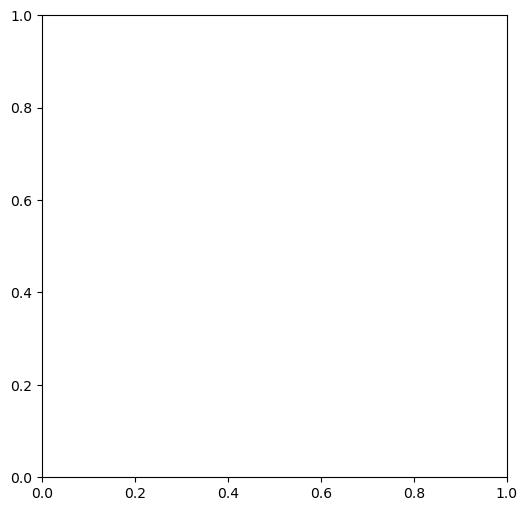

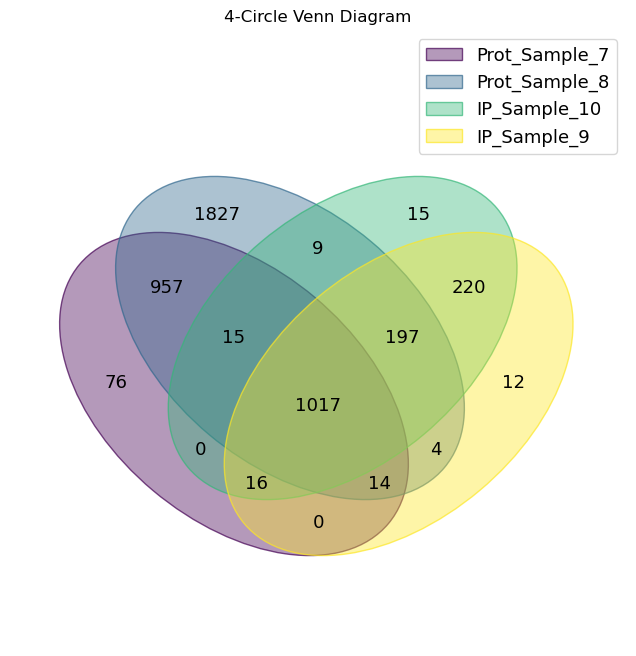

In [76]:
# Convert each sample into a unique binary combination
df_outer['combination'] = df_outer.apply(lambda row: ''.join(row.astype(str)), axis=1)
comb_counts = df_outer['combination'].value_counts()

# Create sets for each column
sets = {
    'Prot_Sample_7': set(df_outer.index[df_outer['Prot_protein_intensity_sample_7'] == 1]),
    'Prot_Sample_8': set(df_outer.index[df_outer['Prot_protein_intensity_sample_8'] == 1]),
    'IP_Sample_10': set(df_outer.index[df_outer['IP_protein_intensity_sample_10'] == 1]),
    'IP_Sample_9': set(df_outer.index[df_outer['IP_protein_intensity_sample_9'] == 1])
}

# Create Venn diagram
fig, ax = plt.subplots(figsize=(6, 6))
venn(sets)
plt.title("4-Circle Venn Diagram")
plt.show()

In [ ]:
df_outer.to_excel("df_outer.xlsx", index=False)